In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("laptop_details.csv")

df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [3]:
df['MRP'] = df['MRP'].str.replace('₹', '')

df['MRP'] = df['MRP'].str.replace(',', '')

df["MRP"] = df["MRP"].astype(int)

In [4]:
## This has been done with the help of regular expression.

df['processor'] = df['Feature'].str.extract('(Intel Core i\d)') # Extracts the processor information
df['ram'] = df['Feature'].str.extract('(\d+ GB DDR4)') # Extracts the RAM information
df['os'] = df['Feature'].str.extract('(Windows \d+)') # Extracts the operating system information
df['ssd'] = df['Feature'].str.extract('(\d+ GB SSD)') # Extracts the SSD information
df['screen_size'] = df['Feature'].str.extract('(\d{2}\.\d+ inch)') # Extracts the screen size information
df['Brand'] = df['Product'].str.extract('([A-Za-z]+)')

In [5]:
df_sorted = df.sort_values('MRP')

df_sorted = df_sorted.drop('Product', axis=1)

df_sorted = df_sorted.drop("Feature",axis = 1)

In [6]:
## Replacing the null values.

df_sorted["Rating"].fillna(df_sorted['Rating'].mean(),inplace = True)
df_sorted["processor"].fillna("Intel Core i5",inplace = True)
df_sorted["ram"].fillna("8 GB DDR4",inplace = True)
df_sorted["os"].fillna("Windows 11",inplace = True)
df_sorted["ssd"].fillna("512 GB SSD",inplace = True)
df_sorted["screen_size"].fillna("15.6 inch",inplace = True)

In [7]:
df_sorted.isnull().sum()

Rating         0
MRP            0
processor      0
ram            0
os             0
ssd            0
screen_size    0
Brand          0
dtype: int64

In [8]:
df_sorted.head()

,Rating,MRP,processor,ram,os,ssd,screen_size,Brand
345,4.00000,14990,Intel Core i5,8 GB DDR4,Windows 11,512 GB SSD,11.6 inch,ASUS
169,4.32117,15990,Intel Core i5,8 GB DDR4,Windows 11,128 GB SSD,14.1 inch,Ultimus
96,4.32117,19490,Intel Core i5,4 GB DDR4,Windows 11,512 GB SSD,15.6 inch,Lenovo
89,4.32117,19490,Intel Core i5,4 GB DDR4,Windows 11,512 GB SSD,15.6 inch,Lenovo
22,3.70000,19490,Intel Core i5,8 GB DDR4,Windows 11,256 GB SSD,15.6 inch,Lenovo


In [9]:
df_sorted = df_sorted.rename(columns={
    'processor': 'Processor',
    'ram': 'RAM',
    'os': 'Operating System',
    'ssd': 'Storage',
    'screen_size': 'Screen Size',
})

df_sorted.columns

Index(['Rating', 'MRP', 'Processor', 'RAM', 'Operating System', 'Storage',
       'Screen Size', 'Brand'],
      dtype='object')

<Axes: >

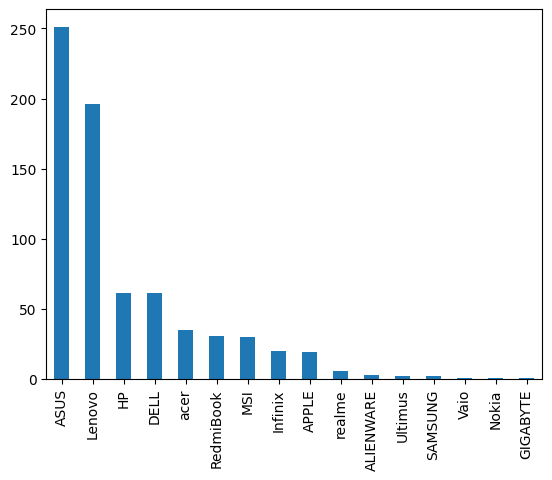

In [10]:
df_sorted["Brand"].value_counts().plot(kind='bar')

In [11]:
asus_prices = df_sorted.loc[df_sorted['Brand'] == 'ASUS', 'MRP']
Lenovo_prices = df_sorted.loc[df_sorted['Brand'] == 'Lenovo', 'MRP']
HP_prices = df_sorted.loc[df_sorted['Brand'] == 'HP', 'MRP']
Dell_prices = df_sorted.loc[df_sorted['Brand'] == 'DELL', 'MRP']
acer_prices = df_sorted.loc[df_sorted['Brand'] == 'acer', 'MRP']
Redmi_prices = df_sorted.loc[df_sorted['Brand'] == 'RedmiBook', 'MRP']
infinix_price = df_sorted.loc[df_sorted['Brand']== 'Infinix','MRP']
apple_prices = df_sorted.loc[df_sorted['Brand'] == 'APPLE', 'MRP']

In [12]:
print("The sum of Asus laptops are:",asus_prices.sum())
print("The sum of Lenovo laptops are:",Lenovo_prices.sum())
print("The sum of HP laptops are:",HP_prices.sum())
print("The sum of Dell laptops are:",Dell_prices.sum())
print("The sum of acer laptops are:",acer_prices.sum())
print("The sum of redmi laptops are:",Redmi_prices.sum())
print("The sum of infinix laptops are:",infinix_price.sum())
print("The sum of apple laptops are:",apple_prices.sum())

The sum of Asus laptops are: 29032565
The sum of Lenovo laptops are: 8909123
The sum of HP laptops are: 3976929
The sum of Dell laptops are: 4493302
The sum of acer laptops are: 2251016
The sum of redmi laptops are: 1231690
The sum of infinix laptops are: 737800
The sum of apple laptops are: 3084310


<Axes: >

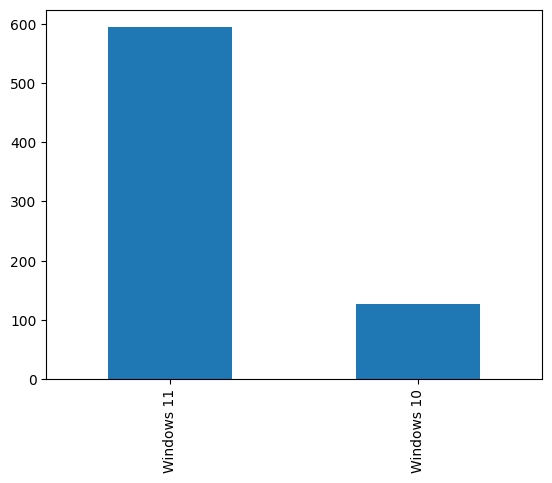

In [13]:
df_sorted['Operating System'].value_counts().plot(kind='bar')

<Axes: >

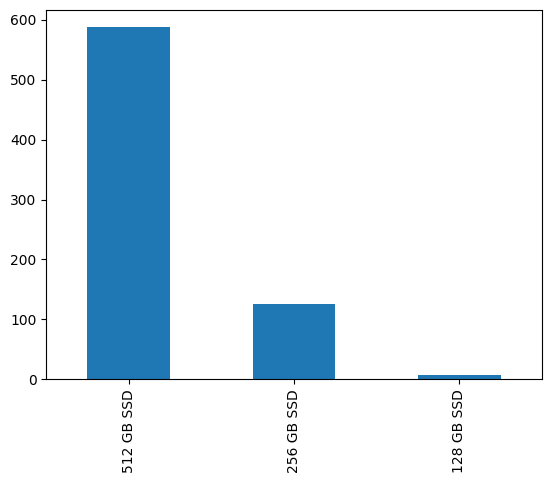

In [14]:
df_sorted["Storage"].value_counts().plot(kind='bar')

<Axes: >

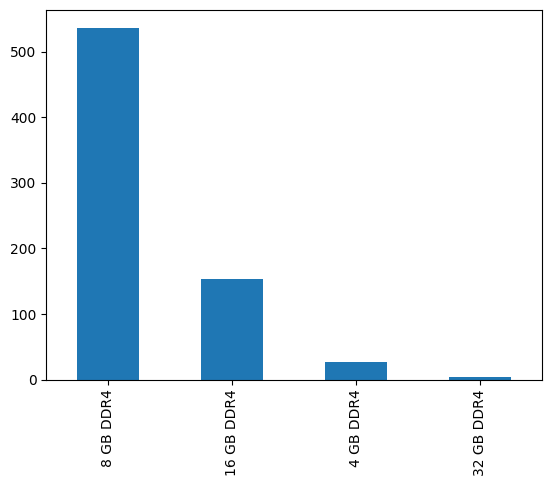

In [15]:
df_sorted["RAM"].value_counts().plot(kind='bar')

<Axes: >

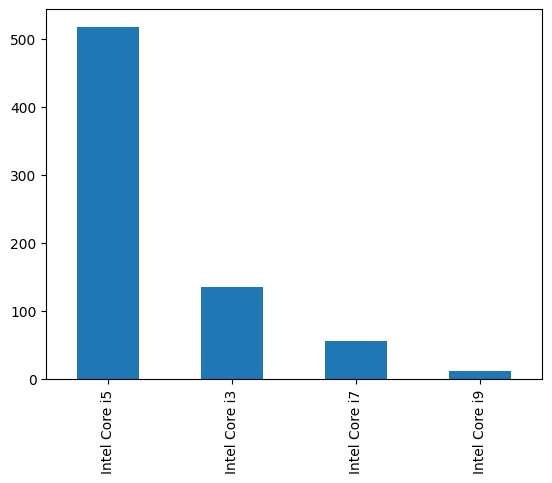

In [16]:
df_sorted["Processor"].value_counts().plot(kind='bar')

<b>From the above value counts we can say that the maximum number of 
<span style="color: black;">Windows 11</span> are <span style="color: blue;">594</span>, 
<span style="color: red;">512 GB SSD</span> are <span style="color: blue;">587</span>, 
<span style="color: orange;">8 GB DDR4</span> are <span style="color: blue;">537</span>, 
and <span style="color: purple;">Intel Core i5</span> are <span style="color: blue;">518</span></b>.

In [17]:
print("The sum of all the laptops that have windows 11:",
      df_sorted.loc[df_sorted['Operating System'] == 'Windows 11', 'MRP'].sum())

print("The sum of all the laptops that have 512 GB SSD:",
      df_sorted.loc[df_sorted['Storage'] == '512 GB SSD', 'MRP'].sum())

print("The sum of all the laptops that have 8 GB DDR4",
     df_sorted.loc[df_sorted['RAM'] == '8 GB DDR4', 'MRP'].sum())

print("The sum of all the laptops that have Intel Core i5 Processor:",
      df_sorted.loc[df_sorted['Processor'] == 'Intel Core i5', 'MRP'].sum())

The sum of all the laptops that have windows 11: 49062714
The sum of all the laptops that have 512 GB SSD: 52960996
The sum of all the laptops that have 8 GB DDR4 41330176
The sum of all the laptops that have Intel Core i5 Processor: 43316088


<Axes: >

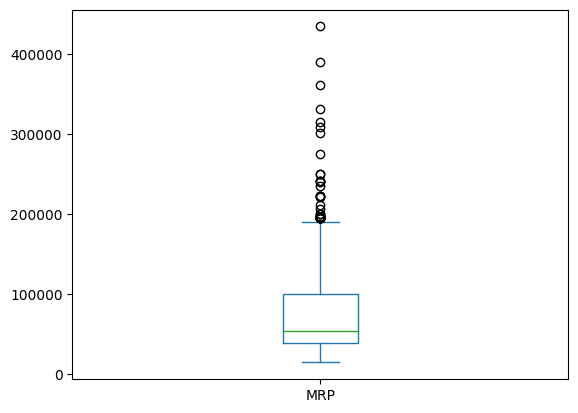

In [18]:
df_sorted.loc[df_sorted['Operating System'] == 'Windows 11', 'MRP'].plot(kind = 'box')

<Axes: ylabel='Density'>

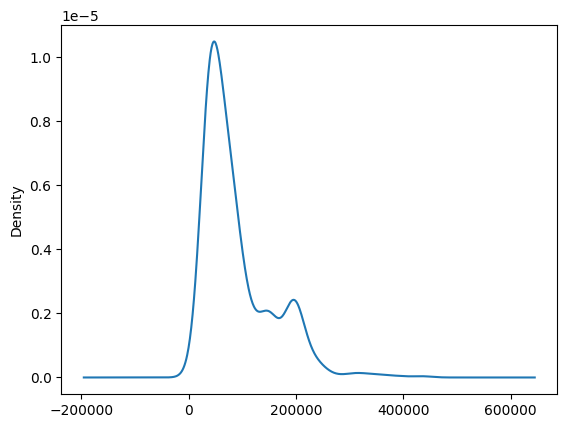

In [19]:
df_sorted.loc[df_sorted['Storage'] == '512 GB SSD', 'MRP'].plot(kind = 'kde')

<Axes: ylabel='Density'>

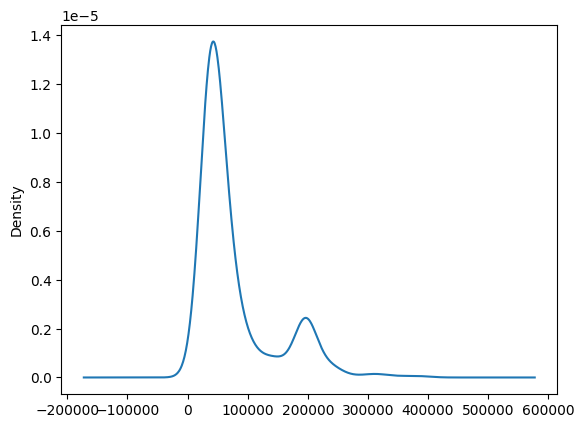

In [20]:
df_sorted.loc[df_sorted['RAM'] == '8 GB DDR4', 'MRP'].plot(kind = 'kde')

<Axes: ylabel='Density'>

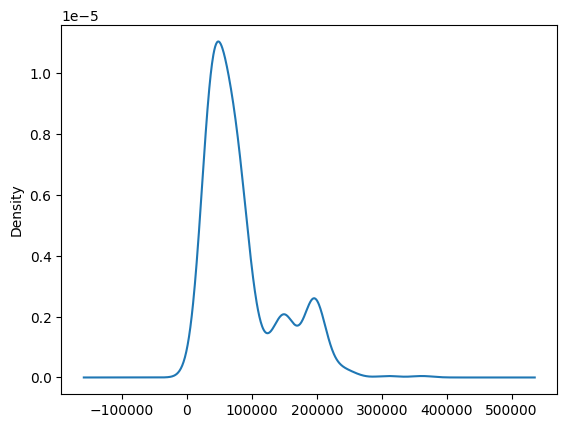

In [21]:
df_sorted.loc[df_sorted['Processor'] == 'Intel Core i5', 'MRP'].plot(kind = 'kde')

## Recommendation Model

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [23]:
df_sorted.head()

,Rating,MRP,Processor,RAM,Operating System,Storage,Screen Size,Brand
345,4.00000,14990,Intel Core i5,8 GB DDR4,Windows 11,512 GB SSD,11.6 inch,ASUS
169,4.32117,15990,Intel Core i5,8 GB DDR4,Windows 11,128 GB SSD,14.1 inch,Ultimus
96,4.32117,19490,Intel Core i5,4 GB DDR4,Windows 11,512 GB SSD,15.6 inch,Lenovo
89,4.32117,19490,Intel Core i5,4 GB DDR4,Windows 11,512 GB SSD,15.6 inch,Lenovo
22,3.70000,19490,Intel Core i5,8 GB DDR4,Windows 11,256 GB SSD,15.6 inch,Lenovo


In [24]:
df_sorted['Operating System'] = df_sorted['Operating System'].str.replace('Windows', '')
df_sorted['Storage'] = df_sorted['Storage'].str.replace('GB SSD', '')
df_sorted['Screen Size'] = df_sorted['Screen Size'].str.replace('inch', '')
df_sorted['RAM'] = df_sorted['RAM'].str.replace('GB DDR4', '')

In [25]:
df_sorted["Operating System"] = df_sorted["Operating System"].astype(int)
df_sorted["Storage"] = df_sorted["Storage"].astype(int)
df_sorted["Screen Size"] = df_sorted["Screen Size"].astype(float)
df_sorted["RAM"] = df_sorted["RAM"].astype(int)

In [26]:
df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 345 to 625
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rating            720 non-null    float64
 1   MRP               720 non-null    int32  
 2   Processor         720 non-null    object 
 3   RAM               720 non-null    int32  
 4   Operating System  720 non-null    int32  
 5   Storage           720 non-null    int32  
 6   Screen Size       720 non-null    float64
 7   Brand             720 non-null    object 
dtypes: float64(2), int32(4), object(2)
memory usage: 39.4+ KB


In [27]:
# select the features and the target variable
X = df_sorted[['RAM', 'Storage', 'Operating System', 'Screen Size']]
y = df_sorted['MRP']

In [28]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
# get the predicted values for the test set
y_pred = model.predict(X_test)

# create a new DataFrame with the predicted values and actual values for the test set
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# print the results DataFrame
print(results_df)

     Actual      Predicted
369   54300   83525.641081
454   45990   47894.915900
114   33900   47894.915900
700   39990   83525.641081
34    73990   83525.641081
..      ...            ...
303   38705   83525.641081
466   38705   83525.641081
240   39990   83525.641081
555   37390   47894.915900
165   85990  118607.910595

[144 rows x 2 columns]


In [36]:
# take user inputs for RAM, Storage, Operating System, and Screen Size
RAM = int(input("Enter RAM in GB: "))
Storage = int(input("Enter storage in GB: "))
Operating_System = input("Enter operating system: ")
Screen_Size = float(input("Enter screen size in inches: "))

# create a DataFrame with the user inputs as a single row
new_laptop = pd.DataFrame({'RAM': [RAM], 'Storage': [Storage], 
                           'Operating System': [Operating_System], 'Screen Size': [Screen_Size]})

# make a price prediction for the new laptop using the trained model
predicted_price = model.predict(new_laptop)

# print the predicted price
print("The predicted price for this laptop is Rs.", round(predicted_price[0]))

Enter RAM in GB: 8
Enter storage in GB: 512
Enter operating system: 11
Enter screen size in inches: 14.1
The predicted price for this laptop is Rs. 74700
